In [1]:
!wget "https://i.pinimg.com/originals/93/8f/86/938f8612487347fd8ba264200586d612.jpg"
!wget "https://previews.123rf.com/images/monamonash/monamonash1508/monamonash150800247/44223395-letters-of-the-alphabet-written-with-a-brush-on-black-background-different-words-on-the-topic-of-the.jpg"

--2021-09-15 07:02:06--  https://i.pinimg.com/originals/93/8f/86/938f8612487347fd8ba264200586d612.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.193.24.222, 2600:140e:6:89e::1931, 2600:140e:6:8ad::1931, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.193.24.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14857 (15K) [image/jpeg]
Saving to: ‘938f8612487347fd8ba264200586d612.jpg’

938f8612487347fd8ba 100%[===================>]  14.51K  --.-KB/s    in 0s      

2021-09-15 07:02:06 (126 MB/s) - ‘938f8612487347fd8ba264200586d612.jpg’ saved [14857/14857]

--2021-09-15 07:02:06--  https://previews.123rf.com/images/monamonash/monamonash1508/monamonash150800247/44223395-letters-of-the-alphabet-written-with-a-brush-on-black-background-different-words-on-the-topic-of-the.jpg
Resolving previews.123rf.com (previews.123rf.com)... 13.226.123.2, 13.226.123.112, 13.226.123.94, ...
Connecting to previews.123rf.com (previews.123rf.com)|13.226.123.2|:443... connected.
HTTP 

In [4]:
!wget "https://static01.nyt.com/images/2020/07/05/pageoneplus/02insider-black/02insider-black-videoSixteenByNineJumbo1600.jpg"

--2021-09-15 07:03:51--  https://static01.nyt.com/images/2020/07/05/pageoneplus/02insider-black/02insider-black-videoSixteenByNineJumbo1600.jpg
Resolving static01.nyt.com (static01.nyt.com)... 151.101.1.164, 151.101.65.164, 151.101.129.164, ...
Connecting to static01.nyt.com (static01.nyt.com)|151.101.1.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24575 (24K) [image/jpeg]
Saving to: ‘02insider-black-videoSixteenByNineJumbo1600.jpg’

02insider-black-vid 100%[===================>]  24.00K  --.-KB/s    in 0.001s  

2021-09-15 07:03:52 (17.7 MB/s) - ‘02insider-black-videoSixteenByNineJumbo1600.jpg’ saved [24575/24575]



### Import Packages

In [2]:
# import the necessary packages
from matplotlib import pyplot as plt
import argparse
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

In [3]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

## Morphological operations

Binary and Grayscale Images

1. Erosion
2. Dilation
3. Opening
4. Closing
5. Morphological Gradient
6. Black hat, White Hat (Top Hat)

### Erosion

Erodes foreground objects and make them smaller. 

In [5]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True,
#	help="path to input image")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "938f8612487347fd8ba264200586d612.jpg",
  "image1" : "02insider-black-videoSixteenByNineJumbo1600.jpg",
  "noisy_image" : "44223395-letters-of-the-alphabet-written-with-a-brush-on-black-background-different-words-on-the-topic-of-the.jpg"
}

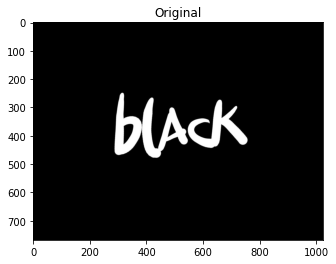

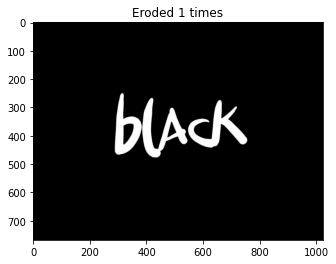

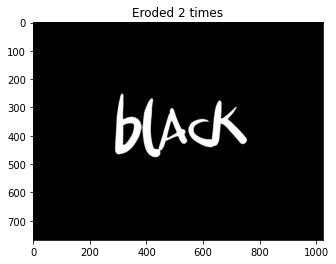

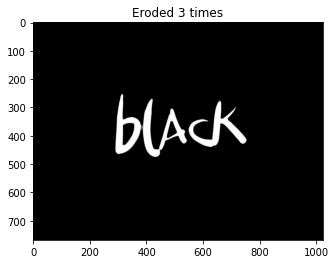

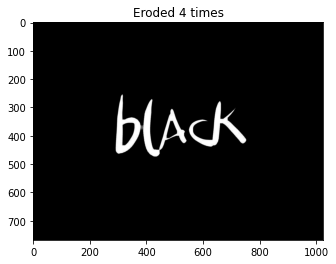

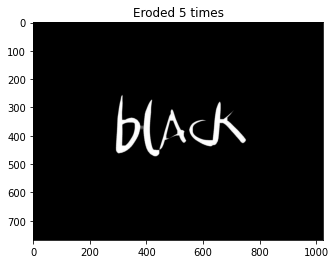

In [7]:
# load the image, convert it to grayscale, and display it to our
# screen
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt_imshow("Original", image)

# apply a series of erosions
for i in range(0, 5):
	eroded = cv2.erode(gray.copy(), None, iterations=i + 1) #none means the s.e. size if 3 x 3
	plt_imshow("Eroded {} times".format(i + 1), eroded)

### Dilation

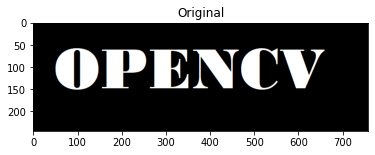

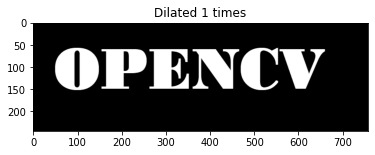

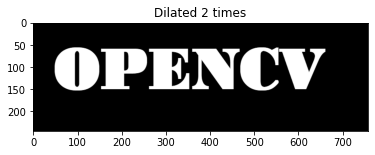

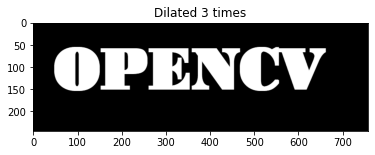

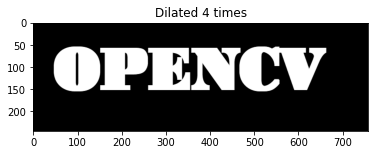

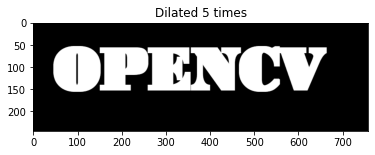

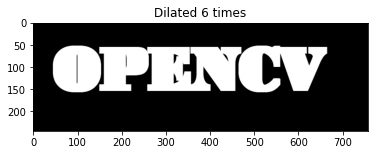

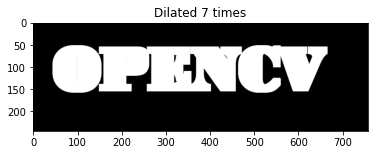

In [ ]:
# display the original image
plt_imshow("Original", image)

# apply a series of dilations
for i in range(0, 7):
	dilated = cv2.dilate(gray.copy(), None, iterations=i + 1)
	plt_imshow("Dilated {} times".format(i + 1), dilated)

### Opening
Erosion followed by Dilation

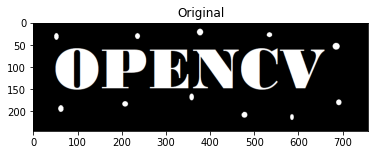

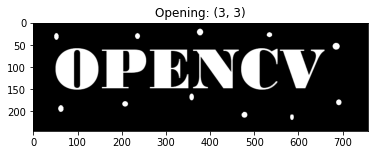

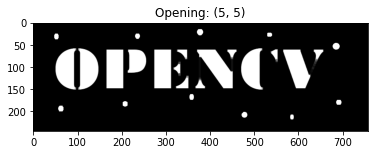

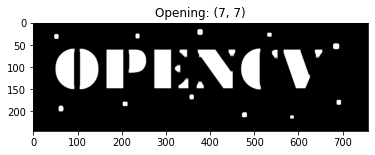

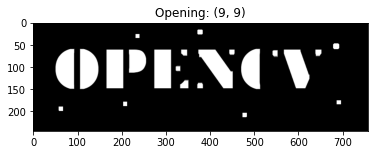

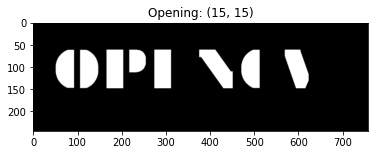

In [ ]:
# close all windows to cleanup the screen, then initialize a list of
# of kernels sizes that will be applied to the image
image_n = cv2.imread(args["noisy_image"])
gray = cv2.cvtColor(image_n, cv2.COLOR_BGR2GRAY)
plt_imshow("Original", image_n)
kernelSizes = [(3, 3), (5, 5), (7, 7),(9,9), (15,15)]

# loop over the kernels sizes
for kernelSize in kernelSizes:
	# construct a rectangular kernel from the current size and then
	# apply an "opening" operation
	kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)  #MORPH_CROSS, MORPH_ELLIPSE
	opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
	plt_imshow("Opening: ({}, {})".format(
		kernelSize[0], kernelSize[1]), opening)

### Closing

Dilation followed by erosion

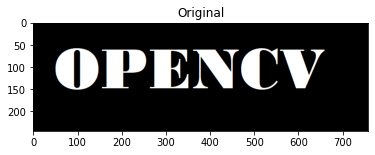

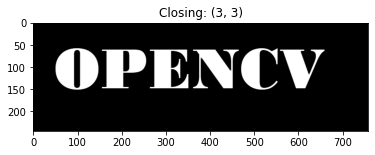

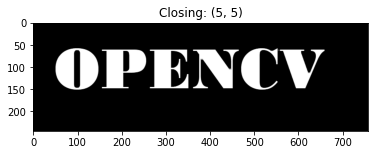

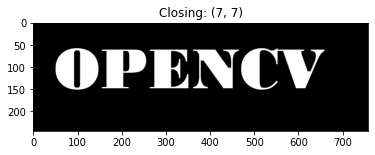

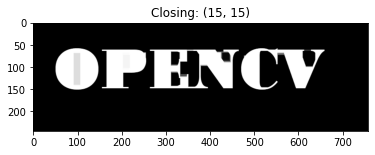

In [ ]:
# display the original image
image = cv2.imread(args["image1"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt_imshow("Original", image)
kernelSizes = [(3, 3), (5, 5), (7, 7),(15,15)]
# loop over the kernels sizes again
for kernelSize in kernelSizes:
	# construct a rectangular kernel form the current size, but this
	# time apply a "closing" operation
	kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
	closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
	plt_imshow("Closing: ({}, {})".format(
		kernelSize[0], kernelSize[1]), closing)

### Morphological gradient

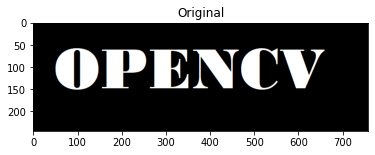

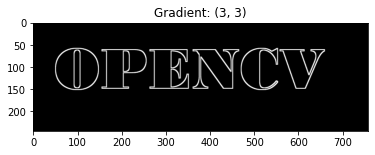

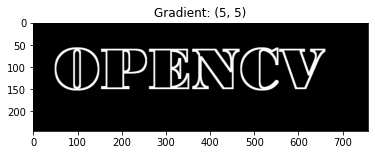

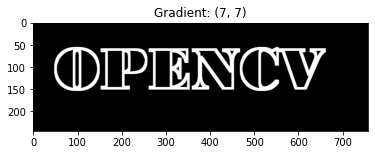

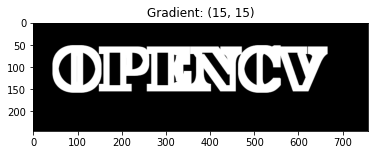

In [ ]:
# display the original image
image = cv2.imread(args["image1"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt_imshow("Original", image)

# loop over the kernels a final time
for kernelSize in kernelSizes:
	# construct a rectangular kernel and apply a "morphological
	# gradient" operation to the image
	kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
	gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)
	plt_imshow("Gradient: ({}, {})".format(
		kernelSize[0], kernelSize[1]), gradient)

## Morphological hats

### Top hat/white hat and black hat

White Hat - Difference Between Original Input Image and the opening 

In [ ]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True,
#	help="path to input image")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "car.png"
}

In [ ]:
# load the image and convert it to grayscale
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# construct a rectangular kernel (13x5) and apply a blackhat
# operation which enables us to find dark regions on a light
# background
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel)

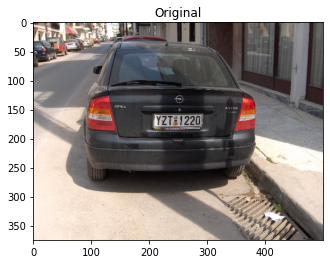

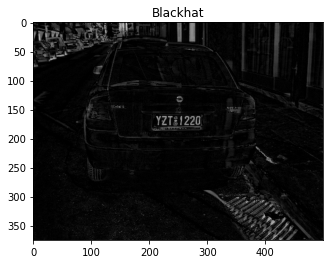

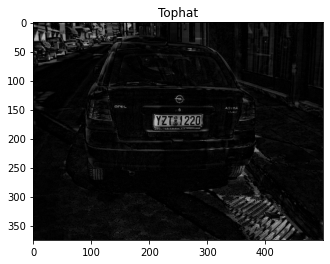

In [ ]:
# similarly, a tophat (also called a "whitehat") operation will
# enable us to find light regions on a dark background
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, rectKernel)

# show the output images
plt_imshow("Original", image)
plt_imshow("Blackhat", blackhat)
plt_imshow("Tophat", tophat)